In [8]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

import os
import datetime as dt

In [9]:
# Import csv file
df = pd.read_csv('data_output\\data_synthetic_data.csv')
df

,metric_0,metric_1,metric_2,metric_3
0,9.095201,8.618810,5.177126,9.000412
1,11.237799,5.579294,1.090178,14.003698
2,9.208430,7.993810,12.656084,12.424803
3,11.420445,12.445159,12.620031,10.525415
4,9.392878,7.805581,7.568871,7.375665
5,12.218073,10.434059,12.893050,9.562189
6,11.572200,10.108340,8.712367,10.183481
7,10.022854,10.722742,10.251751,10.441339
8,8.639124,9.242160,9.072745,7.428191
9,11.147433,10.843148,10.697750,12.223930


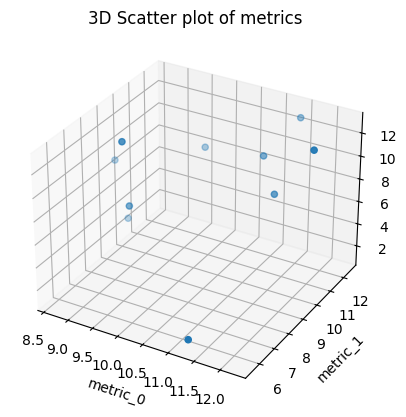

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df["metric_0"], df["metric_1"], df["metric_2"], )

ax.set_xlabel('metric_0')
ax.set_ylabel('metric_1')   
ax.set_zlabel('metric_2')
ax.set_title('3D Scatter plot of metrics')

plt.show()

In [11]:
# Step 1: Read criteria from Excel file
# df = pd.read_excel('criteria.xlsx')

# Step 2: Define your criteria for optimality
df['z1'] = df['metric_0']
df['z2'] = df['metric_1']
df['z3'] = df['metric_2']

# Step 3: Normalize the data if needed
# If criteria are on different scales, you might want to normalize them.

# Step 4: Sort the DataFrame based on each criterion in descending order
df_sorted = df.sort_values(by=['z1', 'z2', 'z3'], ascending=False)

# Step 5: Find the Pareto optimal rows using vectorized operations
is_pareto_optimal = np.ones(df_sorted.shape[0], dtype=bool)
current_max_2 = float('-inf')
current_max_3 = float('-inf')

for i in range(df_sorted.shape[0]):
    if df_sorted.iloc[i]['z2'] <= current_max_2 or df_sorted.iloc[i]['z3'] <= current_max_3:
        is_pareto_optimal[i] = False
    else:
        current_max_2 = df_sorted.iloc[i]['z2']
        current_max_3 = df_sorted.iloc[i]['z3']

pareto_optimal_indices = df_sorted[is_pareto_optimal].index
dominated_indices = df_sorted[~is_pareto_optimal].index

# The `pareto_optimal_indices` array contains the index of rows that form the Pareto front in sorted dataframe.
# The `dominated_indices` array contains the index of rows that are dominated in the sorted dataframe.

# Step 6: Plot the data using Plotly
fig = go.Figure()

# Plot Pareto optimal rows
fig.add_trace(go.Scatter3d(
    x=df.loc[pareto_optimal_indices, 'z1'],
    y=df.loc[pareto_optimal_indices, 'z2'],
    z=df.loc[pareto_optimal_indices, 'z3'],
    mode='markers',
    name='Pareto Optimal',
    marker=dict(
        color='green',
        size=6
    )
))

# Plot dominated rows
fig.add_trace(go.Scatter3d(
    x=df.loc[dominated_indices, 'z1'],
    y=df.loc[dominated_indices, 'z2'],
    z=df.loc[dominated_indices, 'z3'],
    mode='markers',
    name='Dominated',
    marker=dict(
        color='red',
        size=6
    )
))

# Update layout for better visualization
fig.update_layout(scene=dict(
    xaxis_title='z1',
    yaxis_title='z2',
    zaxis_title='z3'
))

# Show the plot
fig.show()

In [12]:
px.data.iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [15]:
# Interactive 3D plot using Plotly

fig = px.scatter_3d(df, x='metric_0', y='metric_1', z='metric_2', color=df.index, labels=df.index, title='3D Scatter plot of metrics')
fig.show()